In [1]:
from google.colab import drive
import os

drive.mount('/content/gdrive')
root_path = 'gdrive/MyDrive/PyCharmProjects/ImageNet/'
os.chdir(root_path)

from datasets import *
from nets import *

device = th.device('cuda:0' if th.cuda.is_available() else 'cpu')
print(f"device: {device}")

Mounted at /content/gdrive
device: cuda:0


In [ ]:
# # !tar -xjvf "/content/gdrive/MyDrive/PyCharmProjects/ImageNet/_Data/HASYv2.tar.bz2" -C "/content/gdrive/MyDrive/PyCharmProjects/ImageNet/_Data/HASYv2"     #[run this cell to extract tar.bz2 files]
# !unzip "/content/gdrive/MyDrive/PyCharmProjects/ImageNet/_Data/hasy-data.zip" -d "/content/gdrive/MyDrive/PyCharmProjects/ImageNet/_Data/HASYv2/"

In [2]:
with open('.//_Data/colab_dataset.pkl', 'rb') as f:
    full_dataset = pickle.load(f)

fold = 2
tds = HASYv2Dataset()
vds = HASYv2Dataset()
tds = tds.cross_val(fold, True, full_dataset)
vds = vds.cross_val(fold, False, full_dataset)
del full_dataset    # In order to avoid using all of the available memory

In [3]:
print(len(tds))
print(len(vds))

151288
16945


In [4]:
with open('.//_Reports/TwoLayerTest1 - 2021-11-12 16_34_06.229661/best_model.pkl', 'rb') as f:
    model = pickle.load(f)

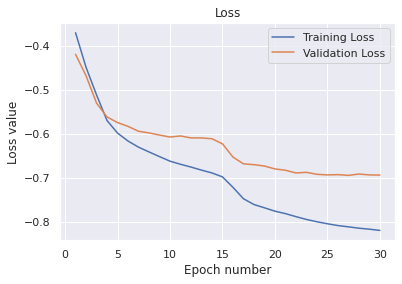

In [5]:
model.trainclass.plot()

1. Training loss: -0.8403
	Training accuracy: 84.13%
1. Validation loss: -0.705
	Validation accuracy: 71.38%
2. Training loss: -0.8432
	Training accuracy: 84.40%
2. Validation loss: -0.7063
	Validation accuracy: 71.40%
3. Training loss: -0.845
	Training accuracy: 84.58%
3. Validation loss: -0.7042
	Validation accuracy: 71.28%
4. Training loss: -0.8467
	Training accuracy: 84.74%
4. Validation loss: -0.7049
	Validation accuracy: 71.29%
5. Training loss: -0.8481
	Training accuracy: 84.88%
5. Validation loss: -0.7077
	Validation accuracy: 71.47%
6. Training loss: -0.8492
	Training accuracy: 84.98%
6. Validation loss: -0.7079
	Validation accuracy: 71.61%
7. Training loss: -0.8512
	Training accuracy: 85.19%
7. Validation loss: -0.7084
	Validation accuracy: 71.56%
8. Training loss: -0.8523
	Training accuracy: 85.28%
8. Validation loss: -0.709
	Validation accuracy: 71.57%
9. Training loss: -0.8534
	Training accuracy: 85.40%
9. Validation loss: -0.7126
	Validation accuracy: 72.03%
10. Training 

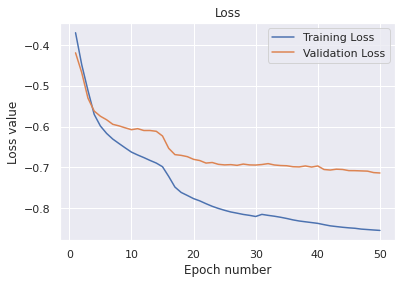

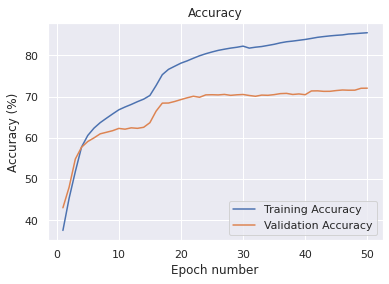

Time for running function train_model:
0.0 hours, 9.0 minutes and 58.06750440597534 seconds


In [7]:
# model = TwoLayer(dirname='TwoLayerTest1')
tdl = DataLoader(tds, batch_size = 10, shuffle=True)
vdl = DataLoader(vds, batch_size = 10000)
train_model(model, 10, 1e-4, nn.NLLLoss(), (tdl, vdl))

1. Training loss: -0.8554
	Training accuracy: 85.59%
1. Validation loss: -0.7132
	Validation accuracy: 72.06%
2. Training loss: -0.8562
	Training accuracy: 85.68%
2. Validation loss: -0.7122
	Validation accuracy: 71.87%
3. Training loss: -0.8571
	Training accuracy: 85.76%
3. Validation loss: -0.7141
	Validation accuracy: 72.00%
4. Training loss: -0.8583
	Training accuracy: 85.88%
4. Validation loss: -0.7144
	Validation accuracy: 72.13%
5. Training loss: -0.8589
	Training accuracy: 85.95%
5. Validation loss: -0.7135
	Validation accuracy: 72.05%
6. Training loss: -0.8598
	Training accuracy: 86.02%
6. Validation loss: -0.7154
	Validation accuracy: 72.24%
7. Training loss: -0.8603
	Training accuracy: 86.09%
7. Validation loss: -0.7155
	Validation accuracy: 72.12%
8. Training loss: -0.8611
	Training accuracy: 86.16%
8. Validation loss: -0.7158
	Validation accuracy: 72.20%
9. Training loss: -0.8616
	Training accuracy: 86.20%
9. Validation loss: -0.7154
	Validation accuracy: 72.10%
10. Traini

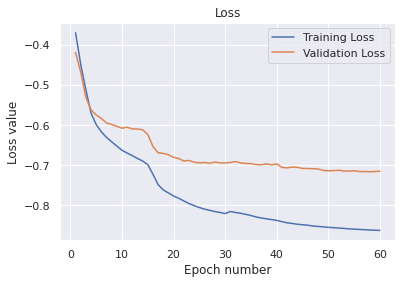

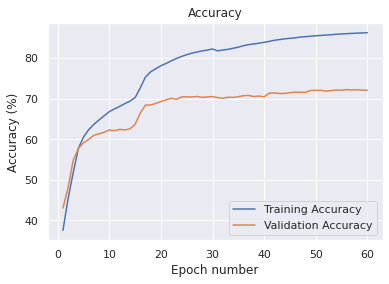

Time for running function train_model:
0.0 hours, 10.0 minutes and 0.4039418697357178 seconds


In [8]:
train_model(model, 10, 1e-4, nn.NLLLoss(), (tdl, vdl))